In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
dataset_path = 'completedataset'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


In [3]:
feature_sets_path = 'data'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'left.h5'
wake_word = 'left'

In [4]:
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))# Load feature sets
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
# Assigning feature sets

In [6]:
print(x_train.shape)  #Checking the dimensions
print(x_val.shape)
print(x_test.shape)
print(y_val)

(77541, 16, 16)
(9678, 16, 16)
(9637, 16, 16)
[12.  1.  1. ... 17.  6. 29.]


In [7]:
wake_word_index = all_targets.index(wake_word)    # Convert ground truth arrays to one wake word (1) and 'other' (0)

y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [8]:
with np.printoptions(threshold=np.inf):
    print(y_val)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [9]:

print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.036267823930564165
0.9637321760694358


In [10]:
print(x_train.shape)

(77541, 16, 16)


In [11]:
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(77541, 16, 16, 1)
(9678, 16, 16, 1)
(9637, 16, 16, 1)


In [12]:
sample_shape = x_test.shape[1:]# Input shape for CNN is size of MFCC of 1 sample

print(sample_shape)

(16, 16, 1)


In [13]:
model = models.Sequential() #Model Training
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [16]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/30
776/776 [==============================] - 8s 10ms/step - loss: 0.1180 - acc: 0.9673 - val_loss: 0.0720 - val_acc: 0.9802
Epoch 2/30
776/776 [==============================] - 7s 9ms/step - loss: 0.0721 - acc: 0.9784 - val_loss: 0.0591 - val_acc: 0.9818
Epoch 3/30
776/776 [==============================] - 7s 9ms/step - loss: 0.0602 - acc: 0.9818 - val_loss: 0.0822 - val_acc: 0.9791
Epoch 4/30
776/776 [==============================] - 7s 9ms/step - loss: 0.0542 - acc: 0.9842 - val_loss: 0.0553 - val_acc: 0.9836
Epoch 5/30
776/776 [==============================] - 7s 9ms/step - loss: 0.0486 - acc: 0.9857 - val_loss: 0.0466 - val_acc: 0.9854
Epoch 6/30
776/776 [==============================] - 7s 9ms/step - loss: 0.0461 - acc: 0.9867 - val_loss: 0.0517 - val_acc: 0.9837
Epoch 7/30
776/776 [==============================] - 7s 9ms/step - loss: 0.0428 - acc: 0.9876 - val_loss: 0.0543 - val_acc: 0.9847
Epoch 8/30
776/776 [==============================] - 7s 9ms/step - loss: 0

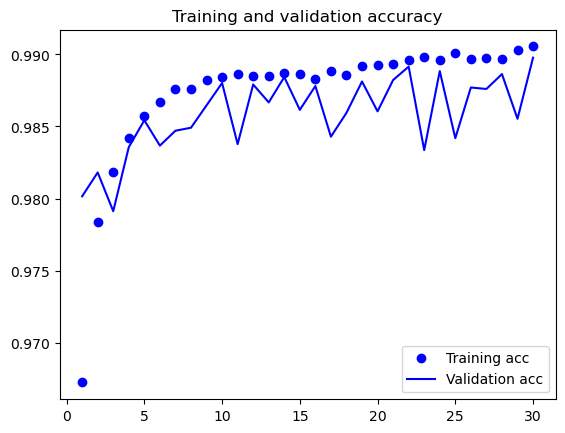

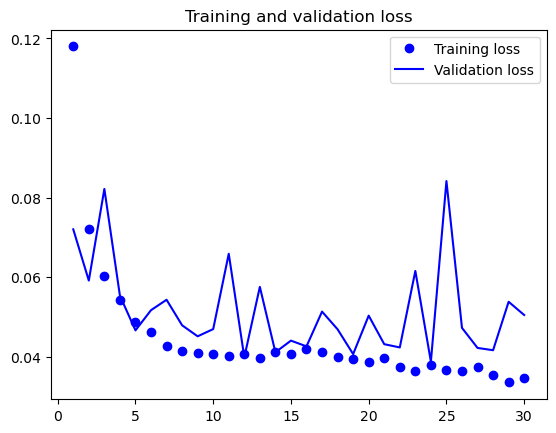

In [17]:
#Results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
models.save_model(model, model_filename)

In [19]:
for idx, y in enumerate(y_test):   # See which are 'left'
    if y == 1:
        print(idx)

6
23
28
29
35
47
51
110
137
153
154
156
279
320
331
369
394
405
409
411
483
504
534
544
553
557
568
573
694
840
845
887
936
976
1010
1107
1121
1136
1141
1171
1204
1219
1229
1235
1250
1288
1291
1302
1319
1368
1427
1451
1463
1516
1518
1533
1572
1574
1585
1594
1625
1651
1719
1723
1735
1749
1785
1793
1808
1819
1838
1860
1861
2012
2023
2052
2083
2085
2096
2118
2163
2189
2219
2253
2263
2288
2294
2365
2409
2466
2492
2595
2621
2628
2660
2679
2715
2719
2723
2774
2812
2814
2825
2851
2927
2928
3016
3067
3083
3097
3127
3136
3146
3155
3201
3256
3275
3302
3306
3333
3337
3343
3354
3424
3435
3465
3467
3501
3594
3645
3674
3679
3691
3693
3731
3732
3764
3884
3936
3952
3966
3967
3969
3982
3998
4013
4042
4078
4082
4163
4191
4224
4245
4297
4314
4316
4322
4345
4351
4355
4378
4381
4418
4475
4490
4493
4544
4576
4583
4596
4652
4734
4760
4777
4787
4815
4890
4892
4933
4941
4964
4990
4994
5029
5054
5081
5087
5117
5130
5137
5208
5237
5255
5283
5398
5491
5508
5520
5531
5568
5590
5676
5699
5721
5789
5834
5836
5896
59

In [20]:
model = models.load_model(model_filename)
#Load model and run it against test set
for i in range(100, 110):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

1/1 [==============================] - 0s 78ms/step
Answer: 0.0  Prediction: [[8.264401e-08]]
1/1 [==============================] - 0s 17ms/step
Answer: 0.0  Prediction: [[2.0953181e-20]]
1/1 [==============================] - 0s 17ms/step
Answer: 0.0  Prediction: [[0.00353302]]
1/1 [==============================] - 0s 17ms/step
Answer: 0.0  Prediction: [[3.1753085e-08]]
1/1 [==============================] - 0s 17ms/step
Answer: 0.0  Prediction: [[1.3028582e-08]]
1/1 [==============================] - 0s 16ms/step
Answer: 0.0  Prediction: [[9.83658e-26]]
1/1 [==============================] - 0s 17ms/step
Answer: 0.0  Prediction: [[3.1722691e-27]]
1/1 [==============================] - 0s 15ms/step
Answer: 0.0  Prediction: [[8.714569e-13]]
1/1 [==============================] - 0s 16ms/step
Answer: 0.0  Prediction: [[2.898659e-09]]
1/1 [==============================] - 0s 19ms/step
Answer: 0.0  Prediction: [[7.796061e-09]]


In [21]:
model.evaluate(x=x_test, y=y_test)

302/302 [==============================] - 1s 1ms/step - loss: 0.0467 - acc: 0.9890


[0.046660155057907104, 0.9890007376670837]